# Loading and Saving

Now that we talked a lot about how to control instruments using Python, let us talk about how to get data in and out of your programs.

## Learning Outcomes

Learn how to:

* load and save text files into your programs
* load and save numpy files
* serialising your objects
* interact with matlab (load and save matlab files)
* more advanced text file parsing
* how to deal with binary data
* advanced file-saving with tables

## Modules we will use

* numpy
* scipy.io
* pickle
* struct
* tables

# Text files in Python

Let us first review how to read and write text files in "plain" Python (although this is often not what you want)

Python has in-build support for file handling, in particular for dealing with text files. To open a file use the `open` command.

In [1]:
# lets start by reading from a previously generated text file
fp = open("testreadfile.txt", "r") # this open command opens a file in "read text mode" (the text is implicit) and returns a stream

In [2]:
# it is worthwhile to have a look at the open documentation in particular look at the different modes
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

So what do we do with the `stream objects`?

In [3]:
help(fp)

Help on TextIOWrapper object:

class TextIOWrapper(_TextIOBase)
 |  TextIOWrapper(buffer, encoding=None, errors=None, newline=None, line_buffering=False, write_through=False)
 |  
 |  Character and line based layer over a BufferedIOBase object, buffer.
 |  
 |  encoding gives the name of the encoding that the stream will be
 |  decoded or encoded with. It defaults to locale.getpreferredencoding(False).
 |  
 |  errors determines the strictness of encoding and decoding (see
 |  help(codecs.Codec) or the documentation for codecs.register) and
 |  defaults to "strict".
 |  
 |  newline controls how line endings are handled. It can be None, '',
 |  '\n', '\r', and '\r\n'.  It works as follows:
 |  
 |  * On input, if newline is None, universal newlines mode is
 |    enabled. Lines in the input can end in '\n', '\r', or '\r\n', and
 |    these are translated into '\n' before being returned to the
 |    caller. If it is '', universal newline mode is enabled, but line
 |    endings are return

In [4]:
# read a single line of the file
l1 = fp.readline()
print(l1)

Etiam vel tortor sodales tellus ultricies commodo.  



In [5]:
# read another line
l2 = fp.readline()
print(l2)

* Nunc aliquet, augue nec adipiscing interdum, lacus tellus malesuada massa, quis varius mi purus non odio.



In [6]:
# read a single character
c1 = fp.read(1)
print(c1)

F


In [7]:
# what happens if we read the line now?
l3 = fp.readline()
print(l3)

usce suscipit, wisi nec facilisis facilisis, est dui fermentum leo, quis tempor ligula erat quis odio.  Nunc porta vulputate tellus.  Nunc rutrum turpis sed pede.  Sed bibendum.  Aliquam posuere.  Nunc aliquet, augue nec adipiscing interdum, lacus tellus malesuada massa, quis varius mi purus non odio.  Pellentesque condimentum, magna ut suscipit hendrerit, ipsum augue ornare nulla, non luctus diam neque sit amet urna.  Curabitur vulputate vestibulum lorem.  Fusce sagittis, libero non molestie mollis, magna orci ultrices dolor, at vulputate neque nulla lacinia eros.  Sed id ligula quis est convallis tempor. 



In [8]:
# let's put the line back togehter
l3 = c1+l3
print(l3)

Fusce suscipit, wisi nec facilisis facilisis, est dui fermentum leo, quis tempor ligula erat quis odio.  Nunc porta vulputate tellus.  Nunc rutrum turpis sed pede.  Sed bibendum.  Aliquam posuere.  Nunc aliquet, augue nec adipiscing interdum, lacus tellus malesuada massa, quis varius mi purus non odio.  Pellentesque condimentum, magna ut suscipit hendrerit, ipsum augue ornare nulla, non luctus diam neque sit amet urna.  Curabitur vulputate vestibulum lorem.  Fusce sagittis, libero non molestie mollis, magna orci ultrices dolor, at vulputate neque nulla lacinia eros.  Sed id ligula quis est convallis tempor. 



In [9]:
# read to the end
s2 = fp.read()
print(s2)

Curabitur lacinia pulvinar nibh.  Nam a sapien.






In [10]:
# lets move back to the beginning
fp.seek(0)

0

In [11]:
# read text as lines
fp.readlines()

['Etiam vel tortor sodales tellus ultricies commodo.  \n',
 '* Nunc aliquet, augue nec adipiscing interdum, lacus tellus malesuada massa, quis varius mi purus non odio.\n',
 'Fusce suscipit, wisi nec facilisis facilisis, est dui fermentum leo, quis tempor ligula erat quis odio.  Nunc porta vulputate tellus.  Nunc rutrum turpis sed pede.  Sed bibendum.  Aliquam posuere.  Nunc aliquet, augue nec adipiscing interdum, lacus tellus malesuada massa, quis varius mi purus non odio.  Pellentesque condimentum, magna ut suscipit hendrerit, ipsum augue ornare nulla, non luctus diam neque sit amet urna.  Curabitur vulputate vestibulum lorem.  Fusce sagittis, libero non molestie mollis, magna orci ultrices dolor, at vulputate neque nulla lacinia eros.  Sed id ligula quis est convallis tempor. \n',
 'Curabitur lacinia pulvinar nibh.  Nam a sapien.\n',
 '\n',
 '\n',
 '\n']

In [12]:
# close the file
fp.close()

### Saving to Text file with Python

The operations for saving to a text are very similar to how to read from files

In [13]:
fp = open("testwritefile.txt", "w")
fp.write("Test text")
fp.write("more text") # this will be concatenated just after the other text
fp.write("start a new line after this\n") # to start a new line put a end of line character
fp.writelines(["line1", "line2", "line3"]) # careful this name is confusing! it does not add newline characters!
fp.close() # IMPORTANT the data does get buffered (see the documentation) so will only fully be written when closing the object

## Files in Numpy

While the plain Python methods are very powerful, they can be also very cumbersome to use. In particular saving numerical data to text files

### Advantages
* can be opened pretty much everywhere

#### Disadvantages
* filesize is large (compared to binary data)
    * slow saving
    * slow loading
* formatting when writing
    * can lead to precision loss
    * slower
* cumbersome to read and write files 
    * need to convert to numerical values
    * delimiters 
    * comments


### Saving numpy arrays

Numpy offers some basic filehandling capabilities for saving and writing numpy arrays.

In [14]:
import numpy as np

# generate a random array to save
a = np.random.randn(10**5)

In [15]:
# save the single array
np.save("testarray", a) # note that numpy automatically adds the "npy" extension


In [16]:
# loading works the same way
a2 = np.load("testarray.npy") #for loading we need to add the extension
np.all(a2==a) # note that comparing 2 floating point arrays with equality is not guaranteed to return True

True

In [17]:
# saving also preserves the shape
np.save("testarray2", a.reshape(10,10**4))

In [18]:
a3 = np.load("testarray2.npy")
a3.shape == (10, 10**4) # for integers we can use it

True

Saving more than a single file is slightly more involved. There is no equivalent to matlab `save`.

In [19]:
np.savez("twoarrays", array1=a, array2=a3) # if you want compression use np.savez_compressed

In [20]:
d = np.load("twoarrays.npz") # note the file extension. Essentially NPZ files are multiple npy files zipped together (uncompressed)
d.files

['array1', 'array2']

In [21]:
a_new = d['array1']
a3_new = d['array2']
print(np.allclose(a_new,a)) # np.allclose is better than comparing for equality
print(np.all(a3_new.shape==a3.shape))

True
True


### When to use?

* need only Python (numpy) interoperability
* written data fits in memory
    * do not need to extend
* need to save numpy arrays

### Numpy and text files

Because it is so common to deal with data in row/column text files (or csv files), numpy has some powerful functions for loading and saving data in these formats. The two functions are `np.loadtxt` and `np.savetxt`

In [22]:
x = np.arange(10).reshape(5, 2) #  5 rows 2 columns
np.savetxt("columndata.txt", x) 

In [23]:
x2 = np.loadtxt("columndata.txt")
np.allclose(x2,x) 

True

The great thing about this is that it has a lot of parsing build-in. Here's an old trace saved from an OSA.

In [24]:
fp = open("osadata.txt")
content = fp.read(370)
fp.close()
print(content)

File,DATA272.txt
Date/Time,07-01-12/13:57
                              
Center,1570.0,nm
Span,260.0,nm
Start,1440.0,nm
Stop,1700.0,nm
Value in Vacuum
Resolution,0.07,nm
Act-Res,0.06,nm
VBW,1000,Hz
Average,Off
Smooth,Off
Smplg,1001,pt
Opt.ATT,Off
Dynamic Range,Normal
Normal



Trace,A
Memory,A
Start,1440.0,nm
Stop,1700.0,nm
1440.0,0.5835E-5,1.0000E-12
1440.26,0.9913E-


Populating the interactive namespace from numpy and matplotlib


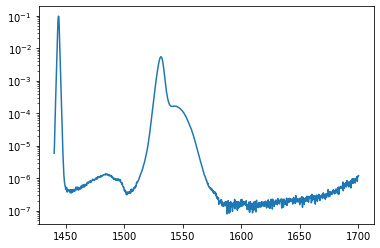

In [25]:
%pylab inline
# reading with numpy loadtxt
wl, s1, s2 = np.loadtxt("osadata.txt", skiprows=24, delimiter=",", unpack=True) #unpack returns the different columns as seperate arrays
plt.semilogy(wl, s1)

Much more powerful conversions are possible please read the [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

## When to use loadtxt/savetxt

`np.loadtxt`:
* everytime you need to load numerical data in text format
    * always try loadtxt first (much easier than manual parsing)

`np.savetxt`:
* avoid with large amounts of data
* use when you want the best interoperability (e.g. load into excel, but why would you after learning python 😀)


# Interacting with Matlab

A lot of people are moving to Python from Matlab or are working with colleagues who use Matlab. Unfortunately Numpy does not allow reading from and writing to matlab files. **Fortunately** `scipy` does.

In [26]:
from scipy.io import loadmat, savemat

mfile = loadmat("chicom.mat")
print(mfile)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: ALPHA, Created on: Fri Feb  4 11:49:16 2000', '__version__': '1.0', '__globals__': [], 'fTHz': array([[-30.  , -29.95, -29.9 , ...,  29.9 ,  29.95,  30.  ]]), 'chi1111': array([[-0.25776039-0.05188768j, -0.26075023-0.05231145j,
        -0.26378004-0.05281668j, ..., -0.26378004+0.05281668j,
        -0.26075023+0.05231145j, -0.25776039+0.05188768j]])}


In [27]:
f = mfile["fTHz"].flatten() # matlab saves as 2-d files even if only 1D
chi = mfile["chi1111"].flatten()
fg,ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].plot(f, chi.real)
ax[1].plot(f, chi.imag)

## How to save Python objects

Sometimes we do not just want to save numerical data or arrays, but Python objects. When we later read the file we want to have those objects back. 

One could write a function to save the object by separating into several e.g. numpy arrays and save using `np.savez`. To load we would then write another function that would write another function to generate  the object back from a `np.load`ed file. 
* This is failure-prone
* We need to remember the format we saved  in
* Changes to the object need to be reflected in the save function
* How to load old files (after the object changed)

From wikipedia:
> serialization (or serialisation) is the process of translating data structures or object state into a format that can be stored (for example, in a file or memory buffer) or transmitted (for example, across a network connection link) and reconstructed later (possibly in a different computer environment)

Python provides a powerful serialisation package called `pickle` which enables this.

In [28]:
# crate some class
class Rect(object):
    def __init__(self, x,y):
        self.x = x
        self.y = y
    def cal_area(self):
        return self.x*self.y
    
x = Rect(5, 7.)

In [29]:
import pickle
fp = open("testpickle.pic", "wb") # note the 'b' which means we are saving in byte format
pickle.dump(x, fp)
fp.close()

In [30]:
fp = open("testpickle.pic", "rb")
xnew = pickle.load(fp)
fp.close()

In [31]:
print(xnew)
print(type(xnew))
print(xnew.x)
print(xnew.y)
print(xnew.cal_area())

<class '__main__.Rect'>
5
7.0
35.0


### Important points when using pickle

* Not all objects are picklable (see the [documentation](https://docs.python.org/3/library/pickle.html#what-can-be-pickled-and-unpickled) for what is and isn't)
    * highly recursive structures can be difficult and/or slow
    * you can customize the "picklability" of your classes
* Not space efficient (compress)
* can be slow (use different protocols)